In [76]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [77]:
train = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')

In [78]:
Survived = train['Survived'].copy()
train_df = train.drop('Survived', axis=1).copy()

In [67]:
traindex = train.index
testdex = test.index
df = pd.concat([train,test])

In [68]:
del train
del test

### Data Munging

In [69]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# Name Length
df['Name_length'] = df['Name'].apply(len)
# Is Alone?
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Title: (Source)
# Kaggle Source- https://www.kaggle.com/ash316/eda-to-prediction-dietanic
df['Title']=0
df['Title']=df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

# Age
df.loc[(df.Age.isnull())&(df.Title=='Mr'),'Age']= df.Age[df.Title=="Mr"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Mrs'),'Age']= df.Age[df.Title=="Mrs"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Master'),'Age']= df.Age[df.Title=="Master"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Miss'),'Age']= df.Age[df.Title=="Miss"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Other'),'Age']= df.Age[df.Title=="Other"].mean()
df = df.drop('Name', axis=1)

# Fill NA
# Categoricals Variable
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

# Continuous Variable
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

## Assign Binary to Sex str
df['Sex'] = df['Sex'].map({'female': 1,
                           'male': 0}).astype(int)
# Title
df['Title'] = df['Title'].map( {'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master':3, 'Other':4} )#.astype(int)
df['Title'] = df['Title'].fillna(df['Title'].mode().iloc[0])
df['Title'] = df['Title'].astype(int)

# Embarked
df['Embarked'] = df['Embarked'].map( {'Q': 0, 'S': 1, 'C': 2} ).astype(int)

# Get Rid of Ticket and Cabin Variable
df= df.drop(['Ticket', 'Cabin'], axis=1)

categorical_features = ["Pclass","Sex","IsAlone","Title", "Embarked"]

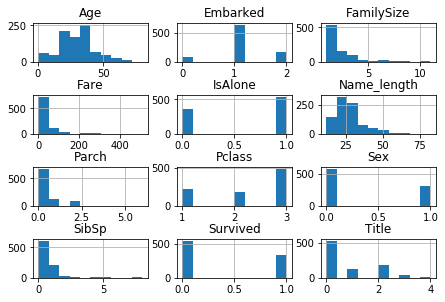

In [79]:
# Histogram
pd.concat([df.loc[traindex, :], Survived], axis=1).hist()
plt.tight_layout(pad=0)
plt.show()

In [83]:
pd.concat([df.loc[traindex, :], Survived], axis=1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Name_length,IsAlone,Title,Survived
PassengerId,,,,,,,,,,,,
1,3,0,22.000000,1,0,7.2500,1,2,23,0,0,0
2,1,1,38.000000,1,0,71.2833,2,2,51,0,1,1
3,3,1,26.000000,0,0,7.9250,1,1,22,1,2,1
4,1,1,35.000000,1,0,53.1000,1,2,44,0,1,1
5,3,0,35.000000,0,0,8.0500,1,1,24,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,0,27.000000,0,0,13.0000,1,1,21,1,4,0
888,1,1,19.000000,0,0,30.0000,1,1,28,1,2,1
889,3,1,21.834533,1,2,23.4500,1,4,40,0,2,0
